In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

In [43]:
mdnRnA = np.loadtxt('../mdnRnA.txt', delimiter=',')
startday = pd.datetime(2013, 7, 1)
dates = pd.date_range(startday, periods=len(mdnRnA), freq='W')

In [44]:
DF = pd.DataFrame({'Rn': mdnRnA, 'dates': dates})

In [45]:
model = ARIMA(endog=DF['Rn'], order=(2, 0, 2), dates=DF['dates'], freq='W')
results = model.fit()
print('MSE ARIMA {}: '.format('Rn'), mean_absolute_error(DF['Rn'].values, results.fittedvalues))

MSE ARIMA Rn:  8.181161060979802


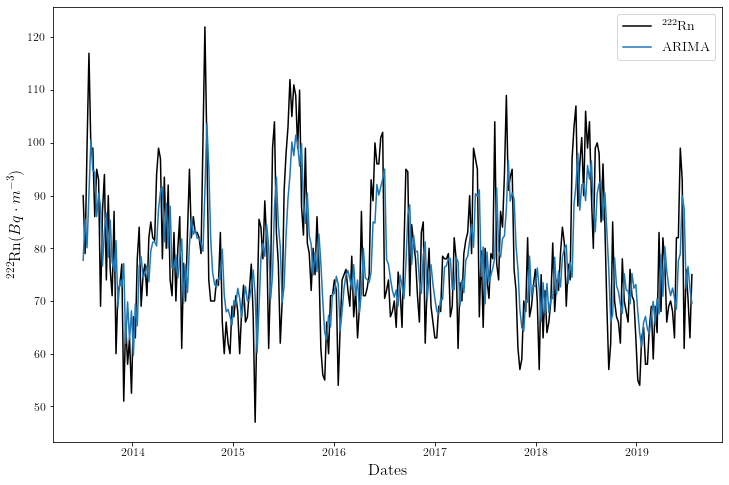

In [46]:
plt.figure(figsize=(12, 8))
plt.plot(DF['dates'].values, DF['Rn'], 'k')
plt.plot(DF['dates'], results.fittedvalues, '-')
plt.ylabel('$^{222}$Rn($Bq \cdot m^{-3}$)', fontsize=16)
plt.xlabel('Dates', fontsize=16)
plt.legend(['$^{222}$Rn', 'ARIMA'], fontsize=14)